# Predictive maintenance using machine learning algorithms(by Decision trees)

Most classification algorithms form a model (some sort of functional mapping) that maps input data to output. But decision trees adopt a different strategy. Decision trees divide the input space into regions and do classification based on majority vote in each region.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read data
data = pd.read_csv("/content/drive/MyDrive/feature_time_48k_2048_load_1.csv")
#Split data for training and testing
train_data, test_data = train_test_split(data, test_size = 0.2, stratify = data['fault'],random_state = 1288)
#model of DT
model_DT = DecisionTreeClassifier(random_state = 532)
X=train_data.iloc[:,:-1]
y=test_data.iloc[:,:-1]
#model fit
model_DT.fit(X, train_data['fault'])


DecisionTreeClassifier(random_state=532)

In [3]:
#predictions model by  train data
train_predictions = model_DT.predict(X)
#prediction model by test data
test_predictions = model_DT.predict(y)

In [4]:
#confultion matrix by train and test model
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

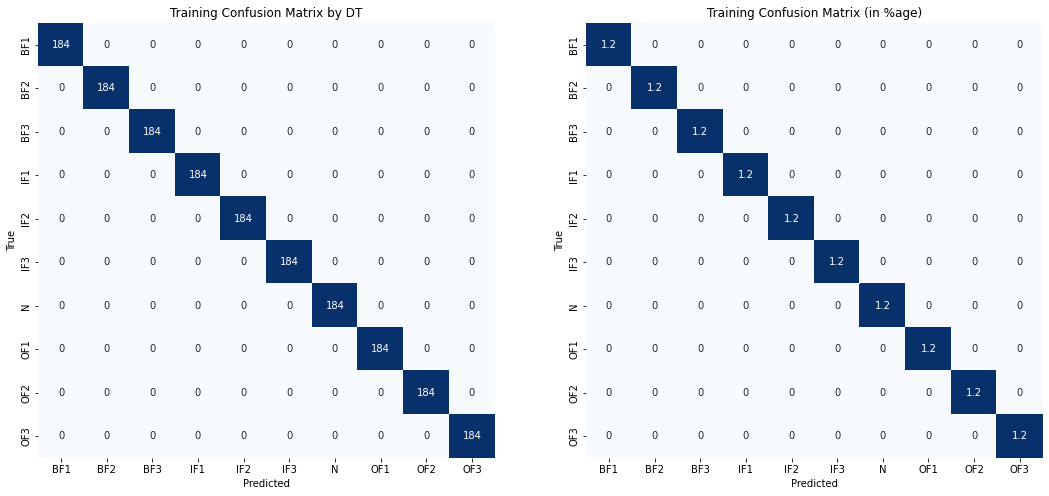

In [5]:
#Types of faults to be classified
fault_type = ['BF1','BF2','BF3','IF1','IF2','IF3','N','OF1','OF2','OF3']
#drawing order of confution matrix by train data
plt.figure(1,figsize=(18,8))
plt.subplot(121)
#Here we specify the table to be drawn
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
#Define the colors and labels on the x and y axis
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix by DT')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
#We repeat the first drawing, but in the form of a percentage
sns.heatmap(train_confu_matrix/155, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()    

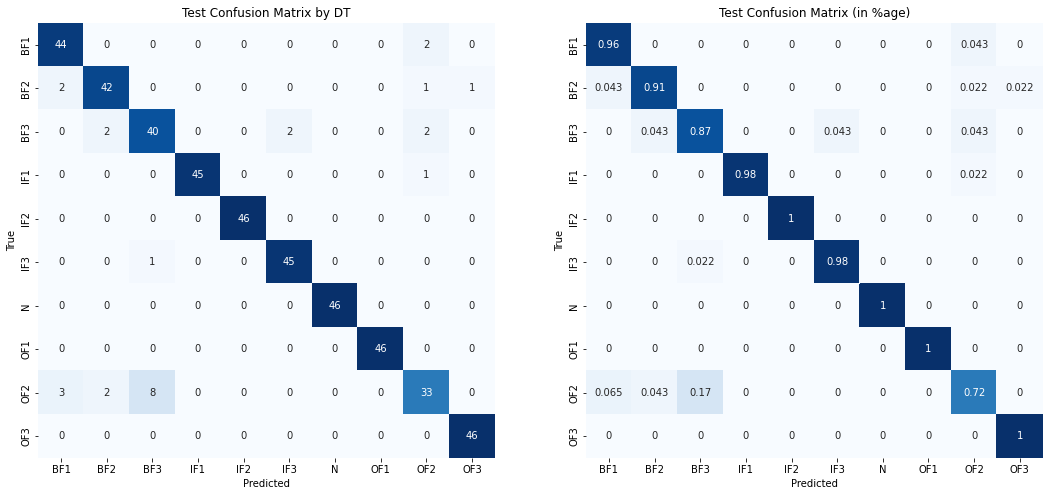

In [6]:
#drawing order
plt.figure(2,figsize=(18,8))
plt.subplot(121)
#Here we specify the table to be drawn
sns.heatmap(test_confu_matrix, annot = True,
#Define the colors and labels on the x and y axis
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix by DT')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
#We repeat the first drawing, but in the form of a percentage
sns.heatmap(test_confu_matrix/46, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy of model by DT

In [7]:
test_accuracy_DT = accuracy_score(test_data['fault'], test_predictions)
print("test accuracy by DT: ", test_accuracy_DT)

test accuracy by DT:  0.941304347826087
